In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load data
df = pd.read_csv(r"C:\Users\Admin\Desktop\Projects\Section 6 - HR Analytics\51. Employee attrition prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv")

print("Shape:", df.shape)
df.head()

Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Target variable to numeric
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop irrelevant columns
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

print("Remaining Columns:", df.columns.tolist())

Remaining Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


C:\Users\Admin\AppData\Local\Temp\ipykernel_9656\2848054818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette="coolwarm")


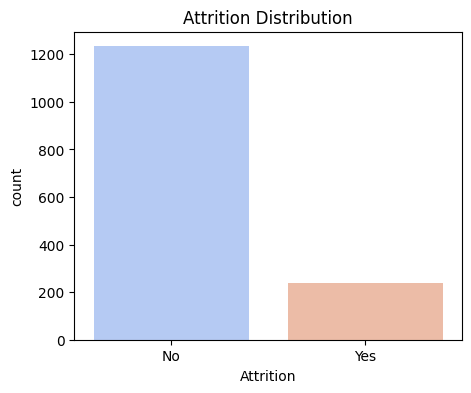

Attrition %:
 Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [15]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Attrition', palette="coolwarm")
plt.title("Attrition Distribution")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

print("Attrition %:\n", df['Attrition'].value_counts(normalize=True)*100)

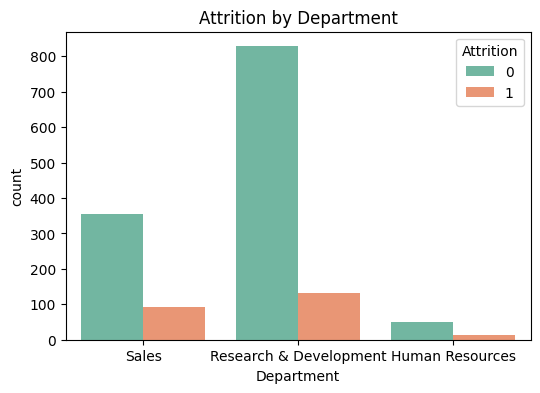

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Department', hue='Attrition', palette="Set2")
plt.title("Attrition by Department")
plt.show()

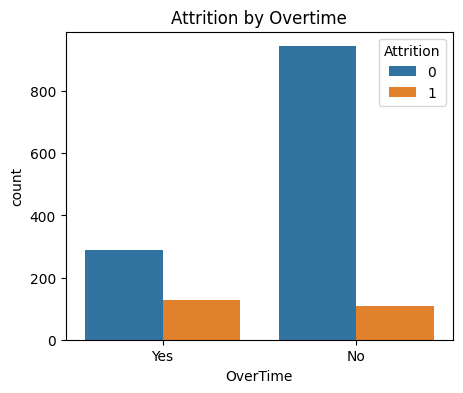

In [6]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Attrition by Overtime")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9656\261583370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Age', palette="Set1")


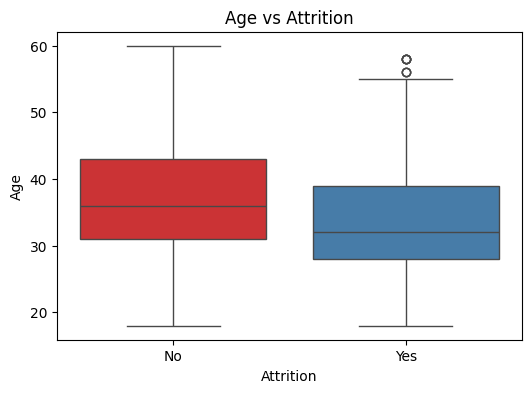

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='Age', palette="Set1")
plt.title("Age vs Attrition")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9656\3522337168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette="seismic")


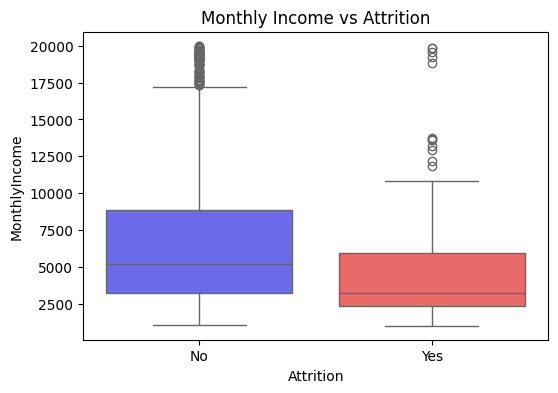

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette="seismic")
plt.title("Monthly Income vs Attrition")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

In [9]:
# One-hot encode categoricals
df_encoded = pd.get_dummies(df, drop_first=True)

print("Encoded shape:", df_encoded.shape)
df_encoded.head()

Encoded shape: (1470, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


In [10]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (1176, 44) Test size: (294, 44)


In [11]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

=== Logistic Regression ===
Accuracy: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       0.91      0.21      0.34        47

    accuracy                           0.87       294
   macro avg       0.89      0.60      0.64       294
weighted avg       0.88      0.87      0.84       294



c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



C:\Users\Admin\AppData\Local\Temp\ipykernel_9656\3346288570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


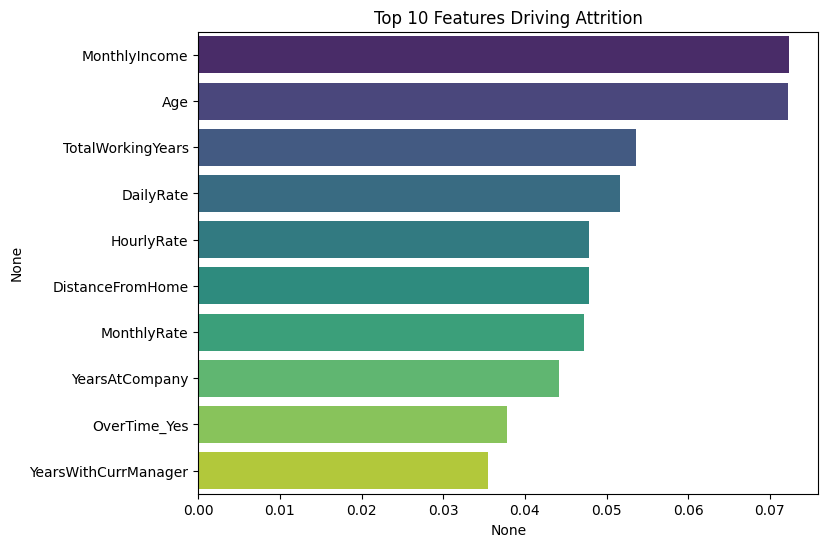

In [23]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 10 Features Driving Attrition")
plt.show()